# Downloading videos from Youtube for training data

## Import libraries and define display video function

In [2]:
import os
import io
import base64
from IPython.display import YouTubeVideo
from IPython.display import HTML

def disp_vid(source, width=480, height=240):
    '''
    Display video using python notebook HTML embedding.
        Inputs -
            source: path to video
            width: display width
            height: display height
        Outputs -
            Video is embedded in notebook directly.
    '''
    video_encoded = base64.b64encode(io.open(source, 'rb').read())
    return HTML("""<video width="{0}" height="{1}" alt="test" controls>
                <source src="data:video/mp4;base64,{2}" type="video/mp4">
                </video>
                """.format(width, height, video_encoded.decode('ascii')))

## Display Youtube video and download
Specify videos to be downloaded from youtube by their ID and save them to the video folder of the repository.

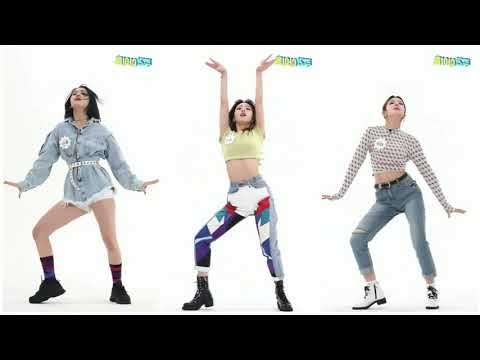

In [3]:
# display video by video ID
YOUTUBE_ID = 'AXszbHehGB8'
YouTubeVideo(YOUTUBE_ID)

In [5]:
# download whole youtube video
curr_dir = 'videos/video2' # define path for download

# create output directory
try: 
    os.makedirs(curr_dir)
except OSError: 
    print('directory exists!')
    
# download youtube video
!cd $curr_dir && youtube-dl -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]' --output full_video.mp4 https://www.youtube.com/watch?v=$YOUTUBE_ID

directory exists!
[youtube] AXszbHehGB8: Downloading webpage
[youtube] AXszbHehGB8: Downloading js player vfl5cScu9
[youtube] AXszbHehGB8: Downloading js player vfl5cScu9
[download] full_video.mp4 has already been downloaded and merged


## Cut segments of dance moves for training
Modify curr_seg and the video timing settings to specify which part of the youtube video should be cut into a segment

In [8]:
# cut video segment and save into a new mp4
curr_seg = 'seg5.mp4' # name section
!cd $curr_dir && ffmpeg -y -i full_video.mp4 -ss 00:00:57 -acodec copy -t 4 $curr_seg 

# display final cut video
disp_vid(curr_dir + '/' + curr_seg)

ffmpeg version 2.8.6 Copyright (c) 2000-2016 the FFmpeg developers
  built with llvm-gcc 4.2.1 (LLVM build 2336.11.00)
  configuration: --prefix=/Volumes/Ramdisk/sw --enable-gpl --enable-pthreads --enable-version3 --enable-libspeex --enable-libvpx --disable-decoder=libvpx --enable-libmp3lame --enable-libtheora --enable-libvorbis --enable-libx264 --enable-avfilter --enable-libopencore_amrwb --enable-libopencore_amrnb --enable-filters --enable-libgsm --enable-libvidstab --enable-libx265 --disable-doc --arch=x86_64 --enable-runtime-cpudetect
  libavutil      54. 31.100 / 54. 31.100
  libavcodec     56. 60.100 / 56. 60.100
  libavformat    56. 40.101 / 56. 40.101
  libavdevice    56.  4.100 / 56.  4.100
  libavfilter     5. 40.101 /  5. 40.101
  libswscale      3.  1.101 /  3.  1.101
  libswresample   1.  2.101 /  1.  2.101
  libpostproc    53.  3.100 / 53.  3.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'full_video.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    